In [ ]:
'''
Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29
'''



In [ ]:
''''
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum)
from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, 
namely CO and NOx (NO + NO2). 
The data comes from the same power plant as the dataset 
used for predicting hourly net energy yield. By contrast, this data is collected in another data range (01.01.2011 - 31.12.2015), includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables. Note that the dates are not given in the instances but the data are sorted in chronological order. See the attribute information and relevant paper for details. Kindly follow the protocol mentioned in the paper (using the first three years' data for training/ cross-validation and the last two for testing) for reproducibility and comparability of works. 
The dataset can be well used for predicting turbine energy yield (TEY) using ambient variables as features.
'''

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [6]:
# Importing Housing.csv
gas_emission = pd.read_csv('gt_2015.csv')

In [7]:
gas_emission.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [8]:
gas_emission.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

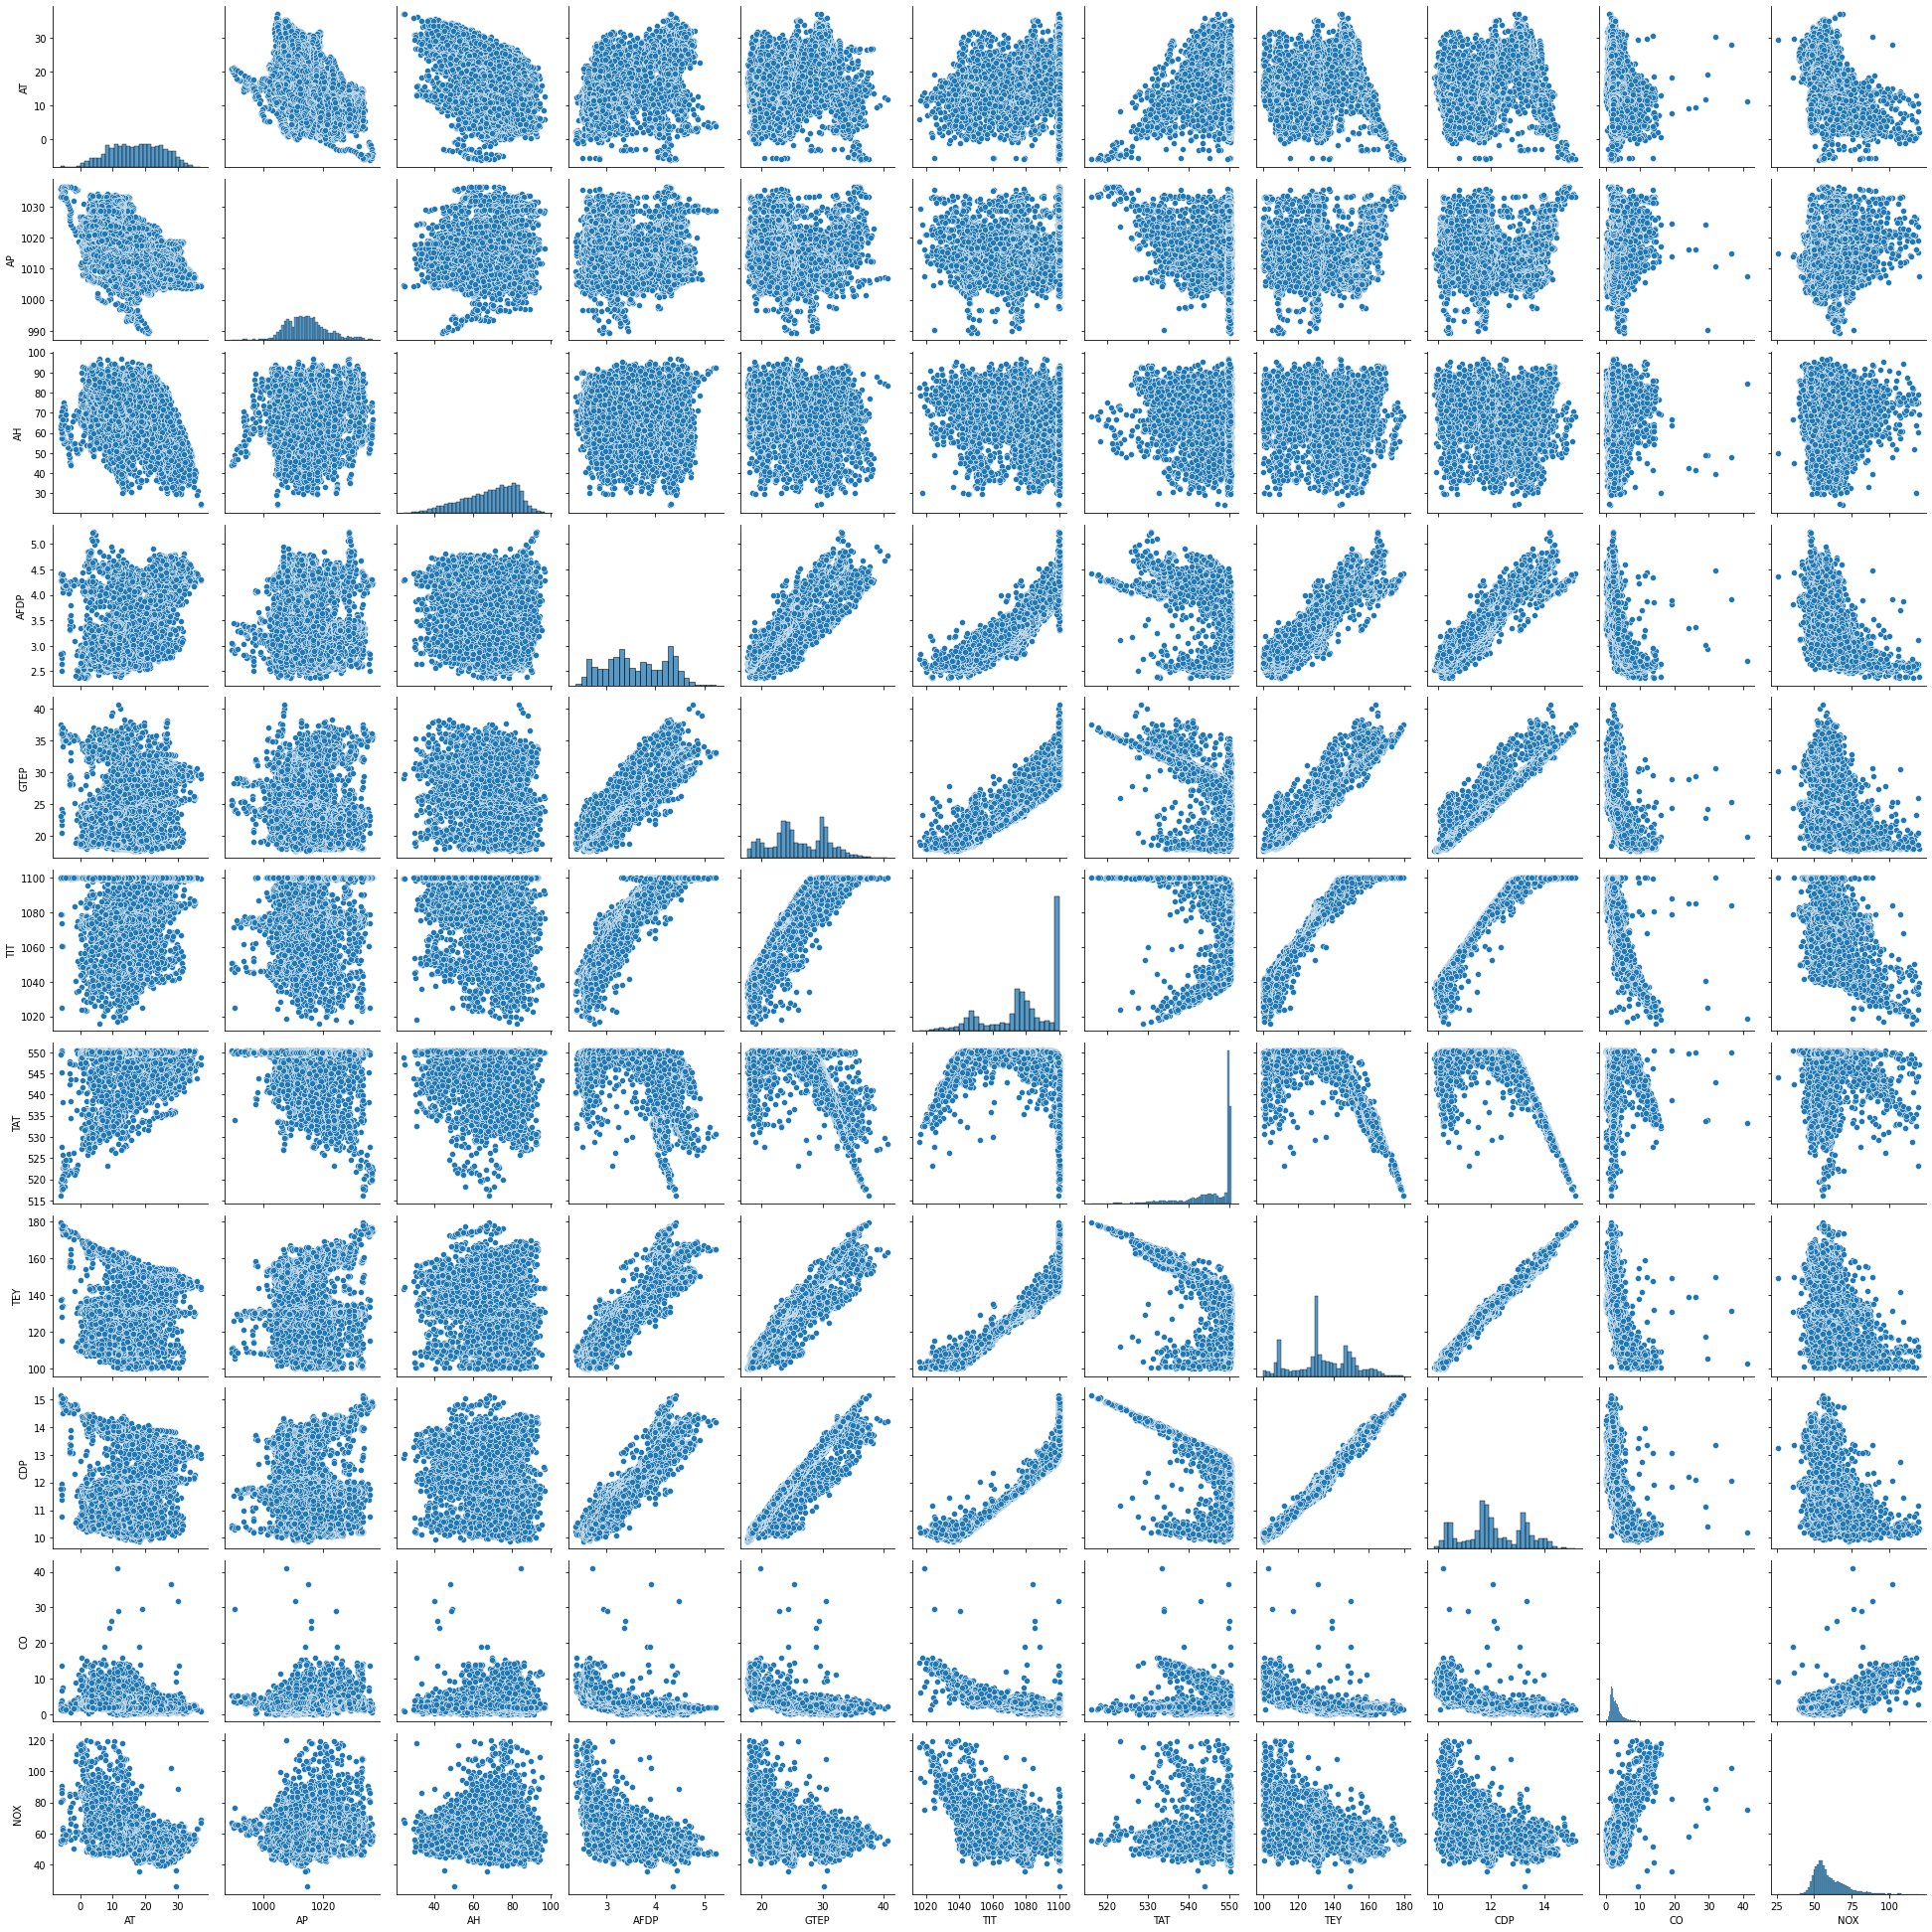

In [12]:
sns.pairplot(gas_emission)
plt.show()

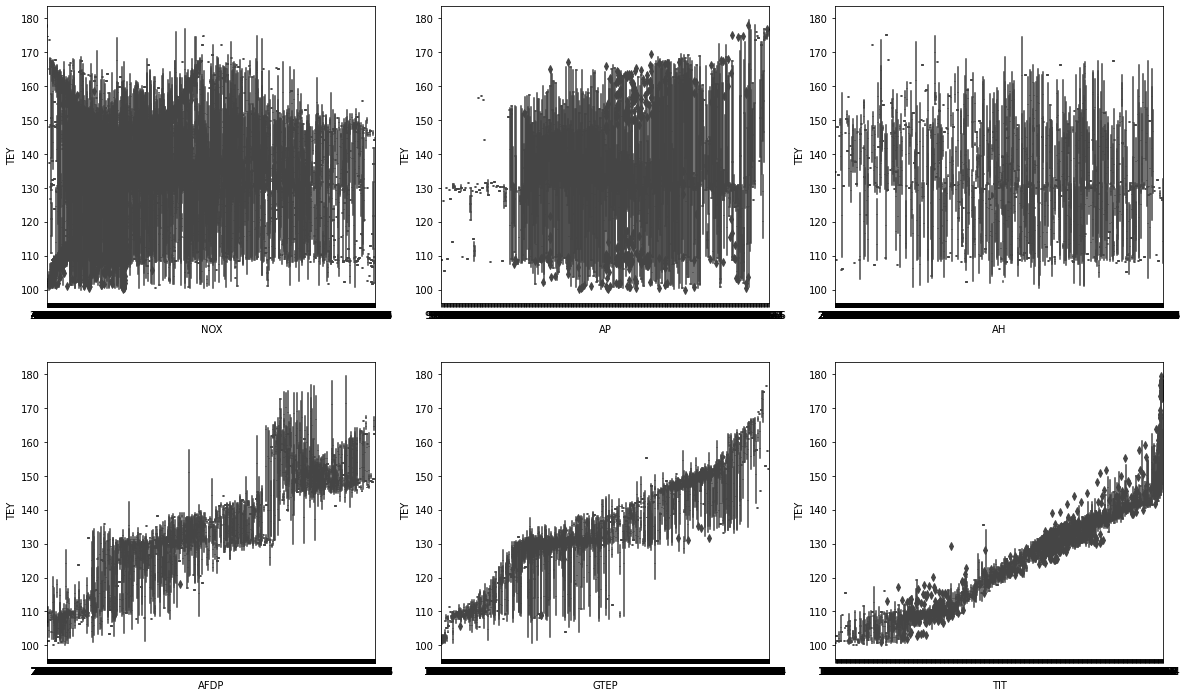

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'AT', y = 'TEY', data =gas_emission )
plt.subplot(2,3,2)
sns.boxplot(x = 'AP', y = 'TEY', data = gas_emission)
plt.subplot(2,3,3)
sns.boxplot(x = 'AH', y = 'TEY', data =gas_emission )
plt.subplot(2,3,4)
sns.boxplot(x = 'AFDP', y = 'TEY', data = gas_emission)
plt.subplot(2,3,5)
sns.boxplot(x = 'GTEP', y = 'TEY', data =gas_emission )
plt.subplot(2,3,6)
sns.boxplot(x = 'TIT', y = 'TEY', data =gas_emission )
plt.subplot(2,3,1)
sns.boxplot(x = 'TAT', y = 'TEY', data = gas_emission)
plt.subplot(2,3,1)
sns.boxplot(x = 'CDP', y = 'TEY', data =gas_emission )
plt.subplot(2,3,1)
sns.boxplot(x = 'CO', y = 'TEY', data = gas_emission)
plt.subplot(2,3,1)
sns.boxplot(x = 'NOX', y = 'TEY', data =gas_emission )
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(gas_emission, train_size = 0.7, test_size = 0.3, random_state = 100)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['AT','AP', 'AH',  'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP','CO','NOX']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [13]:
df_train.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
1106,0.330811,0.702760,0.736060,0.240255,0.408897,0.571081,0.904776,0.321545,0.280890,0.140913,0.585284
6978,0.226818,0.923567,0.842204,0.326471,0.240681,0.715674,0.987554,0.416688,0.359498,0.078299,0.472567
1237,0.362672,0.577495,0.816081,0.253492,0.220653,0.628190,0.981187,0.335389,0.279745,0.091177,0.460101
4337,0.875351,0.403397,0.391673,0.741108,0.548571,0.995140,0.824023,0.595771,0.636152,0.034395,0.306244
432,0.462271,0.450106,0.504733,0.240603,0.442045,0.674362,0.977135,0.360307,0.333359,0.070052,0.447433


In [14]:
df_train.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000
mean,0.542120,0.532381,0.611858,0.429371,0.367653,0.743079,0.886951,0.428368,0.416910,0.070656,0.362141
std,0.187229,0.145244,0.186371,0.212751,0.193805,0.238384,0.157117,0.202408,0.216050,0.054486,0.117083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400016,0.430467,0.480153,0.261321,0.236891,0.646416,0.832562,0.335987,0.300113,0.038892,0.282853
50%,0.547889,0.522293,0.645630,0.410039,0.334260,0.758202,0.974819,0.398439,0.385732,0.056232,0.330291
75%,0.691989,0.611465,0.763326,0.638337,0.535624,0.993925,0.983502,0.593160,0.616739,0.085002,0.418011
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


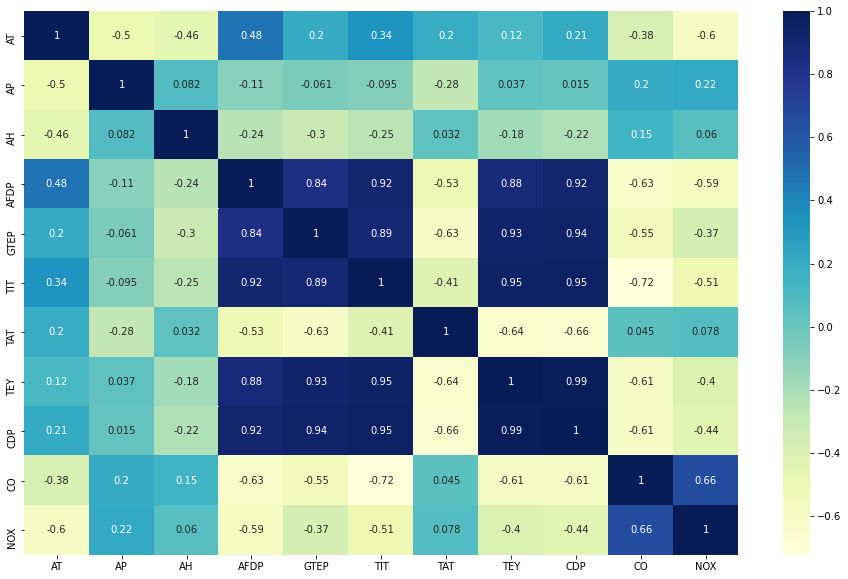

In [250]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

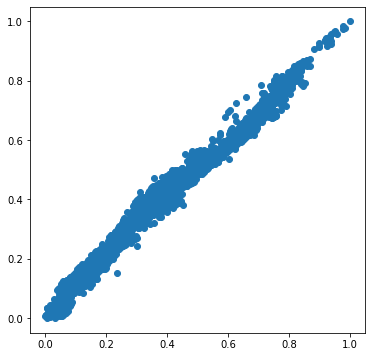

In [251]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.CDP, df_train.TEY)
plt.show()

In [15]:
y_train = df_train.pop('TEY')
X_train = df_train

In [16]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['CDP']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [17]:
lr.params

const    0.041207
CDP      0.928645
dtype: float64

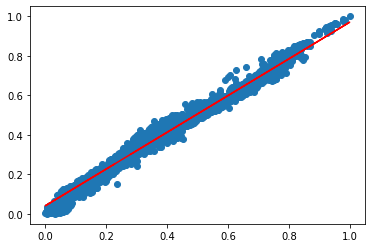

In [20]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.041207 + 0.928645*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [21]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    TEY   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 2.908e+05
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:34:14   Log-Likelihood:                 11384.
No. Observations:                5168   AIC:                        -2.276e+04
Df Residuals:                    5166   BIC:                        -2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0412      0.001     50.961      0.0

In [23]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.72
1,CDP,1.00


In [257]:
# Assign all the feature variables to X
X_train_lm = X_train[['CDP', 'TIT']]

In [258]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.019395
CDP      0.853352
TIT      0.071597
dtype: float64

In [259]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    TEY   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.511e+05
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:15:26   Log-Likelihood:                 11482.
No. Observations:                5168   AIC:                        -2.296e+04
Df Residuals:                    5165   BIC:                        -2.294e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.002     11.187      0.0

In [260]:
# Assign all the feature variables to X
X_train_lm = X_train[['AT','AP', 'AH',  'AFDP', 'GTEP', 'TIT', 'TAT',  'CDP','CO','NOX']]

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    TEY   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.284e+05
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:15:26   Log-Likelihood:                 17611.
No. Observations:                5168   AIC:                        -3.520e+04
Df Residuals:                    5157   BIC:                        -3.513e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2623      0.004     68.023      0.0

In [261]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const    0.262298
AT      -0.162448
AP      -0.033711
AH      -0.014082
AFDP    -0.032144
GTEP    -0.006871
TIT      0.709408
TAT     -0.294650
CDP      0.098601
CO       0.025320
NOX     -0.032238
dtype: float64

In [262]:
X_train.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX'], dtype='object')

In [263]:
X_train_1=X_train

In [264]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [265]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,TIT,1520.72
7,CDP,837.35
6,TAT,542.08
3,AFDP,102.64
0,AT,57.38
4,GTEP,45.10
9,NOX,31.17
2,AH,21.81
1,AP,21.73
8,CO,8.97


In [2]:
X_train.columns

NameError: name 'X_train' is not defined

In [269]:
X_train_new = X_train.drop(["TIT"], axis = 1)

In [270]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [271]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    TEY   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          9.446e+05
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:15:38   Log-Likelihood:                          15669.
No. Observations:                5168   AIC:                                 -3.132e+04
Df Residuals:                    5159   BIC:                                 -3.126e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [272]:
X_train_new.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TAT', 'CDP', 'CO', 'NOX'], dtype='object')

In [273]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,CDP,128.70
3,AFDP,94.14
5,TAT,70.88
4,GTEP,45.01
0,AT,44.84
8,NOX,27.68
1,AP,17.37
2,AH,15.74
7,CO,8.22


In [274]:
X_train_new = X_train_new.drop(["CDP"], axis = 1)

In [275]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [276]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    TEY   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          7.567e+04
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:15:43   Log-Likelihood:                          8862.1
No. Observations:                5168   AIC:                                 -1.771e+04
Df Residuals:                    5160   BIC:                                 -1.766e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [277]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,TAT,70.73
3,AFDP,43.43
0,AT,41.10
7,NOX,27.26
4,GTEP,21.22
1,AP,15.97
2,AH,15.68
6,CO,7.92


In [278]:
X_train_new.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TAT', 'CO', 'NOX'], dtype='object')

In [279]:
X_train_new = X_train_new.drop(["TAT"], axis = 1)

In [280]:
lm1 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [281]:
print(lm1.summary())

                                 OLS Regression Results                                
Dep. Variable:                    TEY   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          7.939e+04
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:15:47   Log-Likelihood:                          8642.3
No. Observations:                5168   AIC:                                 -1.727e+04
Df Residuals:                    5161   BIC:                                 -1.722e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [282]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,AFDP,33.67
4,GTEP,21.19
6,NOX,17.73
1,AP,13.82
0,AT,10.24
2,AH,9.46
5,CO,6.03


In [283]:
X_train_new = X_train_new.drop(["AFDP"], axis = 1)

In [284]:
lm2 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [285]:
print(lm2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    TEY   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          4.770e+04
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:15:52   Log-Likelihood:                          6949.4
No. Observations:                5168   AIC:                                 -1.389e+04
Df Residuals:                    5162   BIC:                                 -1.385e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [286]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,NOX,15.57
1,AP,13.17
2,AH,8.97
3,GTEP,6.10
0,AT,5.98
4,CO,5.95


In [287]:
X_train_new = X_train_new.drop(["NOX"], axis = 1)

In [288]:
lm3 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm3.summary())

                                 OLS Regression Results                                
Dep. Variable:                    TEY   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          5.718e+04
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:15:56   Log-Likelihood:                          6946.5
No. Observations:                5168   AIC:                                 -1.388e+04
Df Residuals:                    5163   BIC:                                 -1.385e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [289]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,AP,11.68
2,AH,8.44
0,AT,5.97
3,GTEP,5.75
4,CO,3.54


In [290]:
X_train_new.columns

Index(['AT', 'AP', 'AH', 'GTEP', 'CO'], dtype='object')

In [291]:
X_train_new = X_train_new.drop(["AP"], axis = 1)
lm3 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm3.summary())

                                 OLS Regression Results                                
Dep. Variable:                    TEY   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          6.134e+04
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:15:58   Log-Likelihood:                          6558.3
No. Observations:                5168   AIC:                                 -1.311e+04
Df Residuals:                    5164   BIC:                                 -1.308e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [292]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,AH,6.26
0,AT,5.92
2,GTEP,4.65
3,CO,2.83


In [293]:
X_train_new = X_train_new.drop(["AH"], axis = 1)
lm3 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm3.summary())

                                 OLS Regression Results                                
Dep. Variable:                    TEY   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          5.960e+04
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:16:00   Log-Likelihood:                          5759.6
No. Observations:                5168   AIC:                                 -1.151e+04
Df Residuals:                    5165   BIC:                                 -1.149e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [294]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,AT,5.23
1,GTEP,4.07
2,CO,1.85


In [295]:
X_train_new = X_train_new.drop(["AT"], axis = 1)
lm3 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm3.summary())

                                 OLS Regression Results                                
Dep. Variable:                    TEY   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          8.748e+04
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:16:03   Log-Likelihood:                          5704.7
No. Observations:                5168   AIC:                                 -1.141e+04
Df Residuals:                    5166   BIC:                                 -1.139e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [296]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GTEP,1.42
1,CO,1.42


In [297]:
y_train_TEY = lm3.predict(X_train_new)

In [305]:
X_train_new

,GTEP,CO
1106,0.408897,0.140913
6978,0.240681,0.078299
1237,0.220653,0.091177
4337,0.548571,0.034395
432,0.442045,0.070052
...,...,...
79,0.147841,0.125114
3927,0.119515,0.062200
5955,0.228691,0.046331
6936,0.242506,0.074256


Text(0.5, 0, 'Errors')

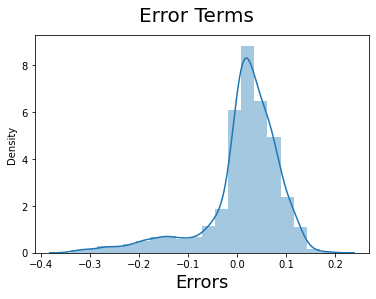

In [298]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_TEY), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [299]:
num_vars = ['AT','AP', 'AH',  'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP','CO','NOX']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [300]:
y_test = df_test.pop('TEY')
X_test = df_test

In [301]:
y_test

671     0.110999
4757    0.216839
5562    0.324188
185     0.786308
4309    0.600428
          ...   
3965    0.664234
3704    0.617669
1356    0.477347
4326    0.579411
4575    0.560156
Name: TEY, Length: 2216, dtype: float64

In [302]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]


In [303]:
# Making predictions
y_pred = lm3.predict(X_test_new)

In [304]:
y_pred

671     0.078751
4757    0.187976
5562    0.263825
185     0.894093
4309    0.619751
          ...   
3965    0.645024
3704    0.611615
1356    0.360220
4326    0.560487
4575    0.556689
Length: 2216, dtype: float64

Text(0, 0.5, 'y_pred')

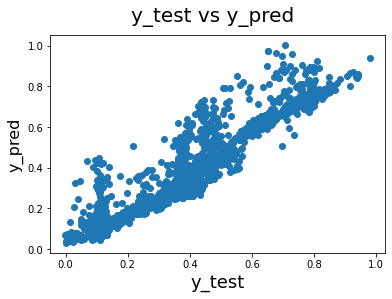

In [307]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [308]:
from sklearn.metrics import r2_score

#Checking the R-squared on the test set

r_squared = r2_score(y_test, y_pred)
r_squared

0.8561279728314055

In [306]:
out_data=pd.DataFrame({'true':y_test,'model_predicted':y_pred})
out_data.to_csv('gasemissionproject.csv')

In [9]:
4/15

0.26666666666666666